In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

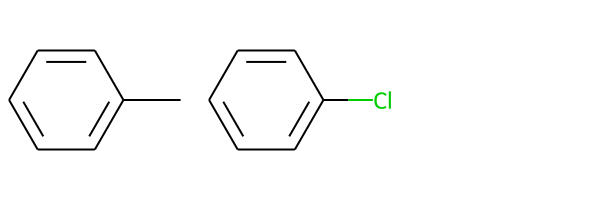

In [3]:
Draw.MolsToGridImage([mol1, mol2])

In [4]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [5]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

## Virtual Screening

In [6]:
!wget http://files.docking.org/2D/EA/EAED.smi

--2021-06-26 12:26:55--  http://files.docking.org/2D/EA/EAED.smi
files.docking.org (files.docking.org) をDNSに問いあわせています... 169.230.75.3
files.docking.org (files.docking.org)|169.230.75.3|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 8075585 (7.7M) [application/smil+xml]
`EAED.smi' に保存中

EAED.smi            100%[===================>]   7.70M   284KB/s 時間 43s        

2021-06-26 12:27:38 (184 KB/s) - `EAED.smi' へ保存完了 [8075585/8075585]



In [7]:
laninamivir = Chem.MolFromSmiles("CO[C@H]([C@H](O)CO)[C@@H]1OC(=C[C@H](NC(=N)N)[C@H]1NC(=O)C)C(=O)O")
laninamivir_fp = AllChem.GetMorganFingerprint(laninamivir, 2)

def calc_laninamivir_similarity(mol):
    fp = AllChem.GetMorganFingerprint(mol, 2)
    sim = DataStructs.TanimotoSimilarity(laninamivir_fp, fp)
    return sim

In [8]:
spl = Chem.rdmolfiles.SmilesMolSupplier("EAED.smi")
len(spl)

117956

In [9]:
similar_mols =[]
for mol in spl:
    sim = calc_laninamivir_similarity(mol)
    if sim > 0.2:
        similar_mols.append((mol, sim))

In [10]:
similar_mols.sort(key=lambda x: x[1], reverse=True)

In [11]:
mols = [l[0] for l in similar_mols[:10]]

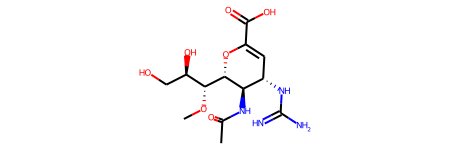

In [12]:
laninamivir

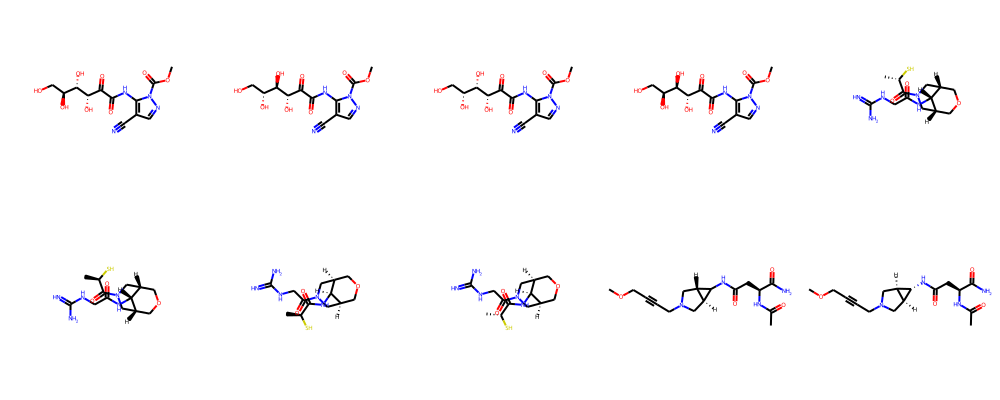

In [13]:
Draw.MolsToGridImage(mols, molsPerRow=5)

## クラスタリング

In [14]:
from rdkit.ML.Cluster import Butina

In [15]:
mols = Chem.SDMolSupplier("ch06_nov_hts.sdf")

fps = []
valid_mols = []

for mol in mols:
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        fps.append(fp)
        valid_mols.append(mol)

RDKit WARNING: [12:28:41] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [12:28:41] ERROR: Counts line too short: '' on line51330
RDKit ERROR: [12:28:41] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [12:28:41] ERROR: Counts line too short: '' on line51499
RDKit ERROR: [12:28:41] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [12:28:41] ERROR: Counts line too short: '' on line52431


In [16]:
distance_matrix = []
for i, fp in enumerate(fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i+1])
    distance_matrix.extend([1-sim for sim in similarities])

In [17]:
clusters = Butina.ClusterData(distance_matrix, len(fps), 0.2, isDistData=True)

In [18]:
len(clusters)

2492

In [19]:
mols_ =[valid_mols[i] for i in clusters[0]]

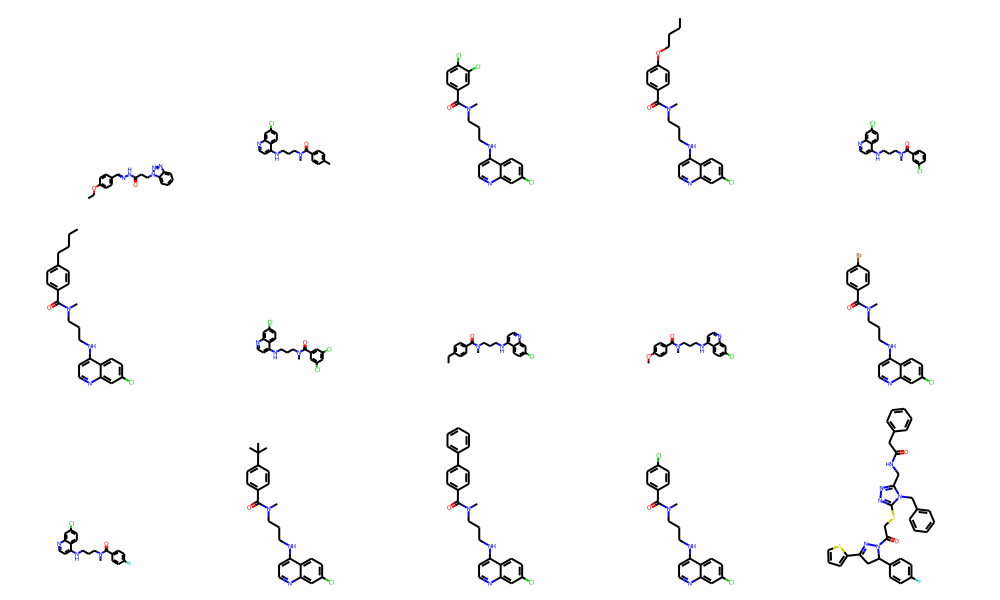

In [20]:
Draw.MolsToGridImage(mols_, molsPerRow=5)

#### SBDD

In [21]:
apx = Chem.MolFromSmiles("COc1ccc(cc1)n2nc(C(=O)N)c3CCN(C(=O)c23)c4ccc(cc4)N5CCCCC5=O")
rvx = Chem.MolFromSmiles("Clc1ccc(s1)C(=O)NC[C@H]2CN(C(=O)O2)c3ccc(cc3)N4CCOCC4=O")

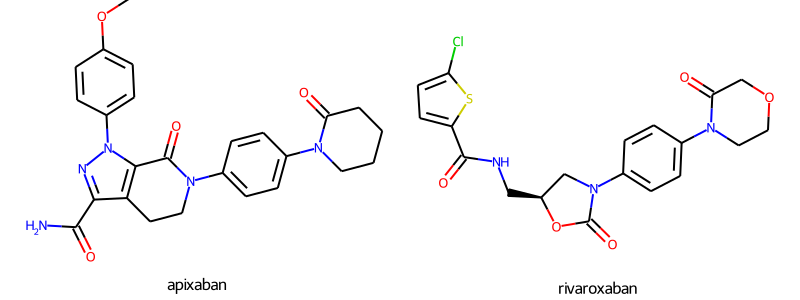

In [22]:
Draw.MolsToGridImage([apx, rvx], legends=["apixaban", "rivaroxaban"], subImgSize=(400, 300), molsPerRow=2)

In [29]:
apx_fp = AllChem.GetMorganFingerprint(apx, 2, useFeatures=True)
rvx_fp = AllChem.GetMorganFingerprint(rvx, 2, useFeatures=True)

In [30]:
DataStructs.TanimotoSimilarity(apx_fp, rvx_fp)

0.40625